In [47]:
import numpy as np
import matplotlib.pyplot as plt

import import_ipynb
from FMCD_y_MCM import mcd, mcm, mcd_3
from FReconstrucciondeseñalesapartirdemuestras import h

## Muestreo

- - -
### t → n/Fs
n: muestras

Fs: frecuencia de muestreo



### 2π F0 t → 2π (F0/Fs) n = 2π f0 n; donde f0 = F0/Fs = k/N, donde N es el período de la señal muestreada y k representa la cantidad de ciclos de la señal analógica de frecuencia F0 que son necesarios para completar un ciclo (N muestras) de la señal muestreada.
- - -
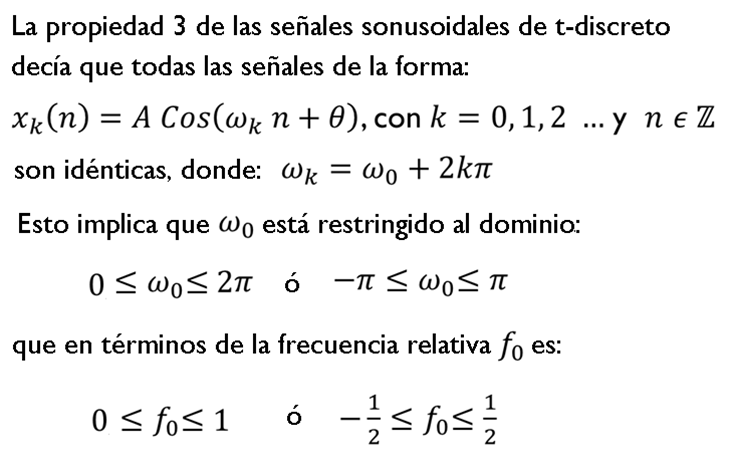

- - -
La propiedad 3 de las señales sinusoidales de t-discreto decía que todas las señales de la forma:

Xk(n) = A Cos (wk n + θ), con k = 0,1,2,... y n ∈ Z

son identicas, donde wk = w0 + 2πk

Esto implica que w0 está restringido al dominio: 

        0 <= w0 <= 2π   ó   -π <= w0 <= π

que en términos de la frecuencia relativa f0 es:

         0 <= f0 <= 1   ó   -1/2 <= f0 <= 1/2
- - -

- - -
### Teorema del muestreo (Nyquist): 
### Si x(t) es una señal de banda limitada |Ω| <= Ωmax (|F| <= Fmax) entonces se podrá reconstruir x(t) a partir de sus muestras UNIVOCAMENTE si:
### **Fs > 2Fmax**  que en términos de la frecuencia relativa es: |fmax| < 1/2
### Si no se cumple esta condición, ocurre ALIASING
- - -

In [48]:
#DEFINICIÓN DE LAS SEÑALES

t = np.arange(0,10,0.0001)
n = np.arange(len(t)) #definimos las muestras como un vector que tenga la misma longitud que el t
F0, Fs1, Fs2, Fs3, Fs4 = 120, 200, 240, 360, 480
xa = np.cos(2*np.pi*F0*t)
x1 = np.cos(2*np.pi*(F0/Fs1)*n)
x2 = np.cos(2*np.pi*(F0/Fs2)*n)
x3 = np.cos(2*np.pi*(F0/Fs3)*n)
x4 = np.cos(2*np.pi*(F0/Fs4)*n)

- Con Fs = 200 Hz vamos a tener menos de dos puntos por ciclo, estamos submuestreando. No se verá. Lo que se va a observar es como si se estuviese muestreando una de 80 Hz (diferencia entre 200 y 120). **OCURRE EL FÉNOMENO DE ALIASING.**

- Con Fs = 240 Hz, se va a muetran solo los picos máximos. Si se puede muestrear pero sólo porque es un coseno sin desfasaje.

- Con Fs = 360 Hz y Fs = 480 Hz se lograra visualizar bien la señal.

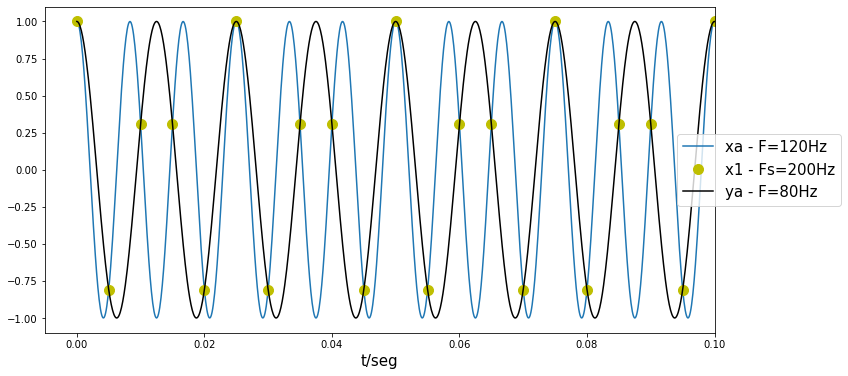

In [49]:
plt.figure(figsize=(12,6))
plt.plot(t,xa)
plt.plot(n/Fs1,x1,'yo',ms=10)
plt.plot(t, np.cos(2*np.pi*(Fs1-F0)*t),'k')
plt.xlim(-0.005,0.1)
plt.xlabel('t/seg',fontsize=15)
plt.legend(('xa - F=120Hz', 'x1 - Fs=200Hz','ya - F=80Hz'),prop={'size':15}, bbox_to_anchor=(1.2,0.5))
plt.show()

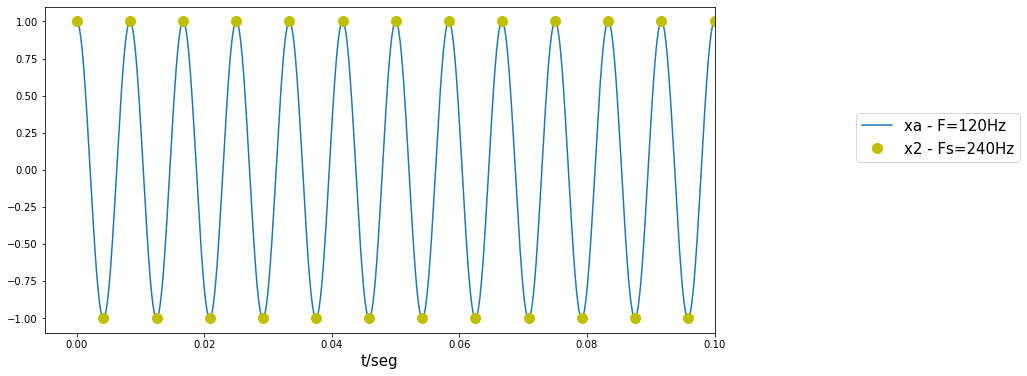

In [50]:
plt.figure(figsize=(12,6))
plt.plot(t,xa)
plt.plot(n/Fs2,x2,'yo',ms=10)
plt.xlim(-0.005,0.1)
plt.xlabel('t/seg',fontsize=15)
plt.legend(('xa - F=120Hz', 'x2 - Fs=240Hz'),prop={'size':15}, bbox_to_anchor=(1.2,0.5))
plt.show()

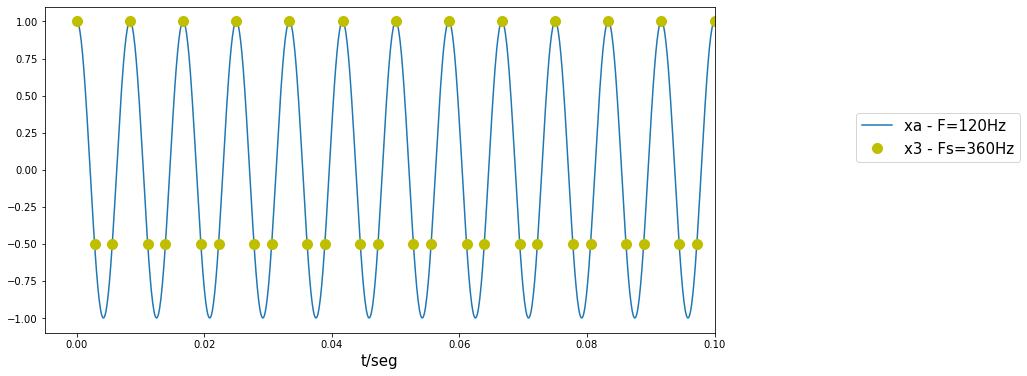

In [51]:
plt.figure(figsize=(12,6))
plt.plot(t,xa)
plt.plot(n/Fs3,x3,'yo',ms=10)
plt.xlim(-0.005,0.1)
plt.xlabel('t/seg',fontsize=15)
plt.legend(('xa - F=120Hz', 'x3 - Fs=360Hz'),
           prop={'size':15}, bbox_to_anchor=(1.2,0.5))
plt.show()

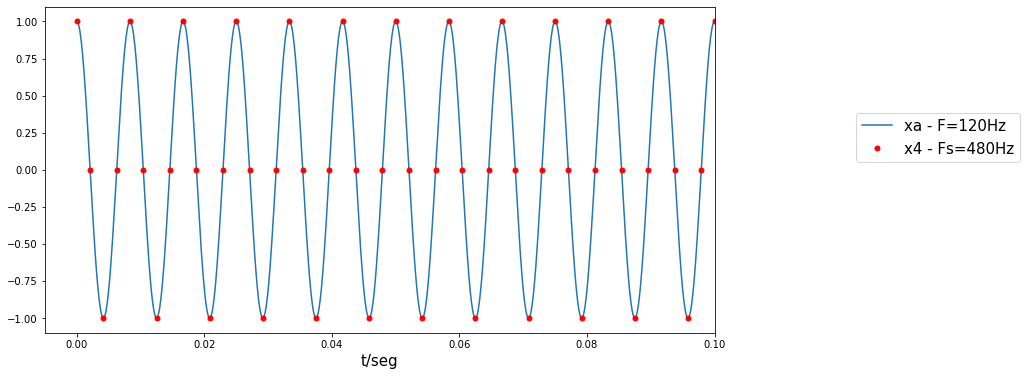

In [52]:
plt.figure(figsize=(12,6))
plt.plot(t,xa)
plt.plot(n/Fs4,x4,'ro',ms=5)
plt.xlim(-0.005,0.1)
plt.xlabel('t/seg',fontsize=15)
plt.legend(('xa - F=120Hz', 'x4 - Fs=480Hz'),
           prop={'size':15}, bbox_to_anchor=(1.2,0.5))
plt.show()

### Tarea 1: Analizar el caso límite de muestreo (2 puntos por ciclo) para señales cos(2π F0 t + α), sin(2π F0 t) y sin(2π F0 t + α) con α = π/6.



In [53]:
#DEFINO GRÁFICAS - COSENO DESPLAZADO

t = np.arange(0,10,0.0001)
n = np.arange(len(t)) #definimos las muestras como un vector que tenga la misma longitud que el t
Fo, Fs = 120, 240
x = np.cos((2*np.pi*F0*t) + (np.pi/6))
x_1 = np.cos((2*np.pi*(Fo/Fs)*n) + (np.pi/6))

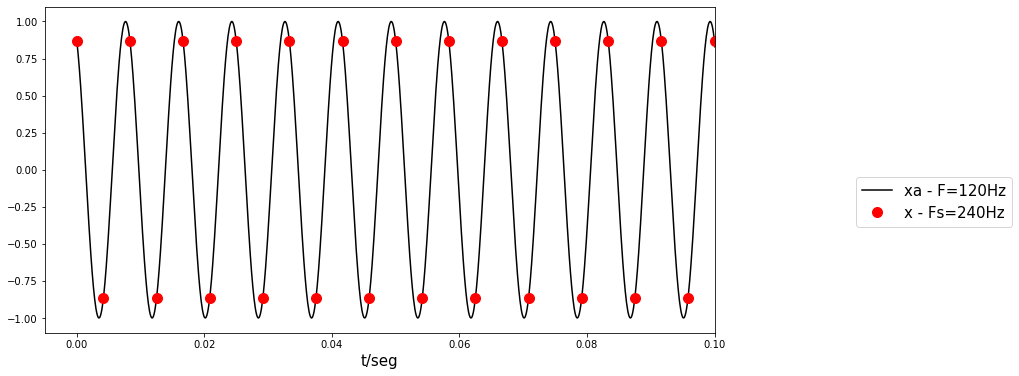

In [54]:
plt.figure(figsize=(12,6))
plt.plot(t,x,color="black")
plt.plot(n/Fs,x_1,'ro',ms=10)
plt.xlim(-0.005,0.1)
plt.xlabel('t/seg',fontsize=15)
plt.legend(('xa - F=120Hz', 'x - Fs=240Hz'),
           prop={'size':15}, bbox_to_anchor=(1.2,0.5))
plt.show()

In [55]:
#DEFINO GRÁFICAS - SENO SIN DESPLAZAR

t = np.arange(0,10,0.0001)
n = np.arange(len(t)) #definimos las muestras como un vector que tenga la misma longitud que el t
F0, Fs1  = 120, 240
xa = np.sin(2*np.pi*F0*t)
x1 = np.sin(2*np.pi*(F0/Fs1)*n)

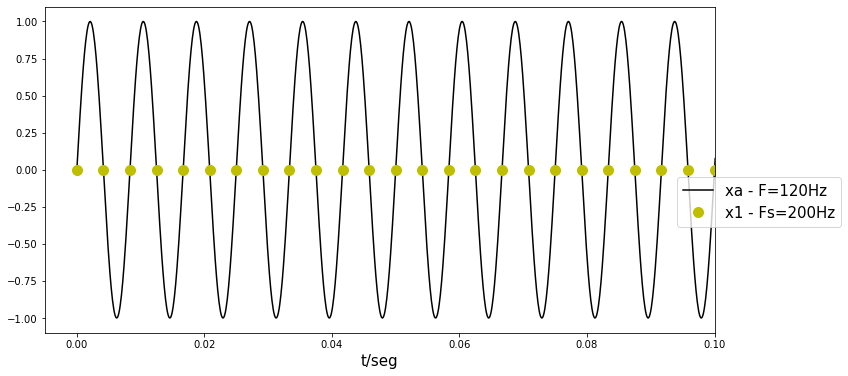

In [56]:
plt.figure(figsize=(12,6))
plt.plot(t,xa,color="black")
plt.plot(n/Fs1,x1,'yo',ms=10)
plt.xlim(-0.005,0.1)
plt.xlabel('t/seg',fontsize=15)
plt.legend(('xa - F=120Hz', 'x1 - Fs=200Hz','ya - F=80Hz'),prop={'size':15}, bbox_to_anchor=(1.2,0.5))
plt.show()

In [57]:
#DEFINO GRÁFICAS - SENO DESPLAZADO

t = np.arange(0,10,0.0001)
n = np.arange(len(t)) #definimos las muestras como un vector que tenga la misma longitud que el t
Fo, Fs = 120, 240
x = np.sin((2*np.pi*F0*t) + (np.pi/6))
x_1 = np.sin((2*np.pi*(Fo/Fs)*n) + (np.pi/6))

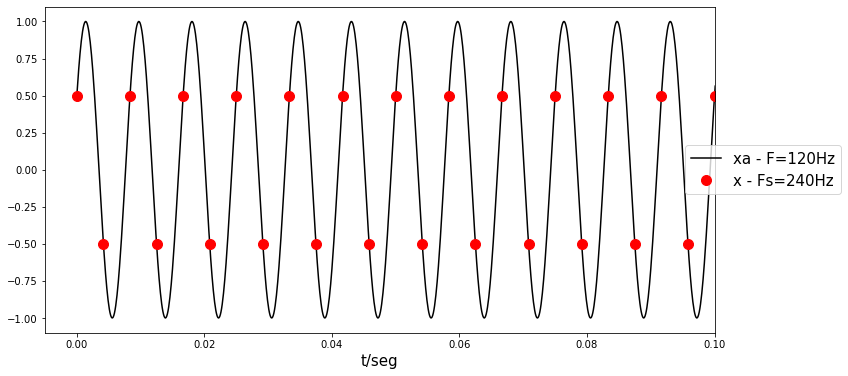

In [58]:
plt.figure(figsize=(12,6))
plt.plot(t,x,color="black")
plt.plot(n/Fs,x_1,'ro',ms=10)
plt.xlim(-0.005,0.1)
plt.xlabel('t/seg',fontsize=15)
plt.legend(('xa - F=120Hz', 'x - Fs=240Hz'),
           prop={'size':15}, bbox_to_anchor=(1.2,0.5))
plt.show()

## Muestreo de una señal con más de una frecuencia

In [59]:
F1, F2, F3 = 120, 150, 280
xa = np.cos(2*np.pi*F1*t) + np.sin(2*np.pi*F2*t) + 3*np.cos(2*np.pi*F3*t)

        mcd(a/b,c/d) - - -> mcd(a,c)/mcm(b,d)

In [60]:
A = mcd (120,150)
print (A)

30


In [61]:
mcd (A,280)

10

In [62]:
print ("La frecuencia de la señal xa es:",mcd_3(120, 150, 280)) #máximo común divisor

La frecuencia de la señal xa es: 10


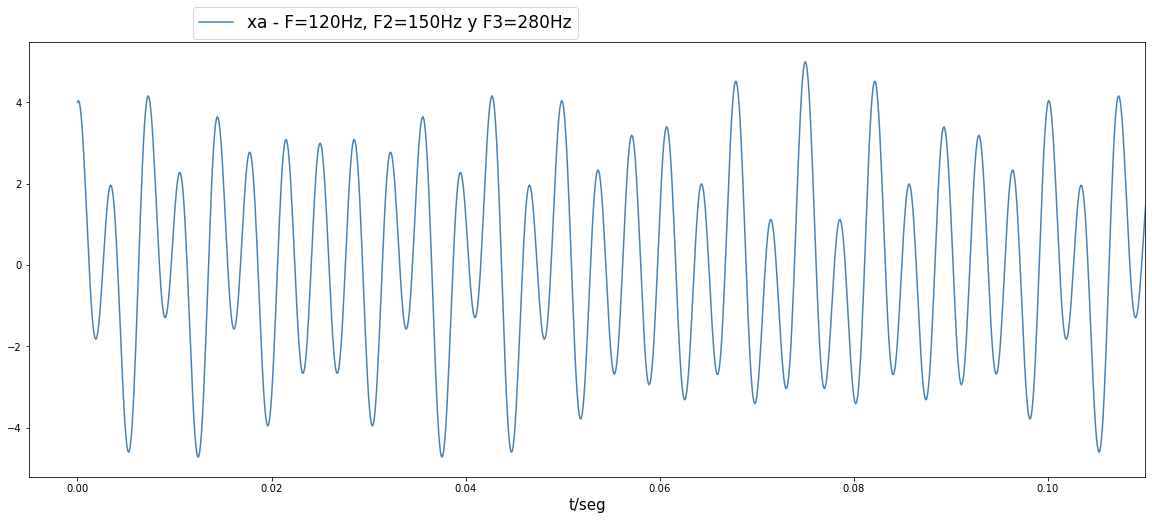

In [63]:
plt.figure(figsize=(20,8))
plt.plot(t,xa,'steelblue')
plt.xlim(-0.005,0.11)
plt.xlabel('t/seg',fontsize=15)
plt.legend(('xa - F=120Hz, F2=150Hz y F3=280Hz',),
           prop={'size':17}, bbox_to_anchor=(0.5,1.1))
plt.show()

In [64]:
Fs1 = 300
n1 = np.arange(len(t)) #vector de las muestras
x1 = np.cos(2*np.pi*(F1/Fs1)*n) + np.sin(2*np.pi*(F2/Fs1)*n) + 3*np.cos(2*np.pi*(F3/Fs1)*n)

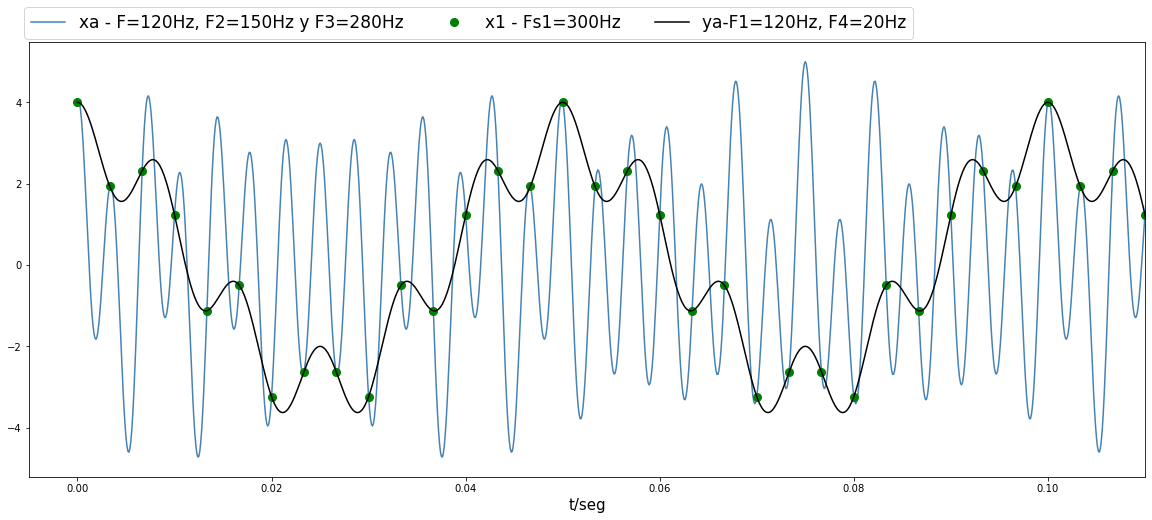

In [65]:
xlv = np.array([0,0.1]) #para marcar un período con líneas
plt.figure(figsize=(20,8))
plt.plot(t,xa,'steelblue')
plt.plot(n1/Fs1,x1,'go',ms=8) #señal muestreada

plt.plot(t,np.cos(2*np.pi*F1*t)+3*np.cos(2*np.pi*20*t),'k') #supuesta señal de la que proviene
#El primer término si se ve.
#El segundo término por ser un seno y estar muestreando al doble, no se ve.
#El tercer término se ve a 20 Hz.

plt.xlim(-0.005,0.11)
plt.xlabel('t/seg',fontsize=15)
plt.legend(('xa - F=120Hz, F2=150Hz y F3=280Hz','x1 - Fs1=300Hz','ya-F1=120Hz, F4=20Hz'),
           prop={'size':17}, ncol=3, bbox_to_anchor=(0.8,1.1))
plt.show()

## Reconstrucción de señales a partir de sus muestras

In [66]:
xrec1 = h(2000,2000,x1[0:200],300)
#primer argumento: número de puntos n
#segundo argumento: frecuencia de muestreo Fs
#tercer argumento: la función con su número de muestras (datos)
#cuarto argumento: frecuencia de muestreo Fs
t1 = np.arange(len(xrec1))/2000

<string>:9: RuntimeWarning: invalid value encountered in double_scalars


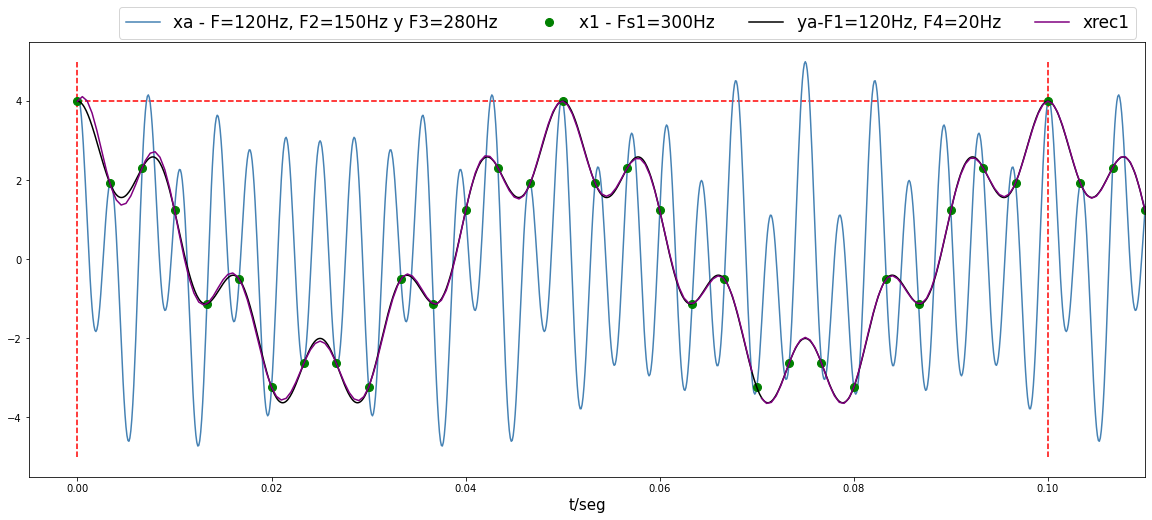

In [77]:
xlv = np.array([0,0.1])
plt.figure(figsize=(20,8))
plt.plot(t,xa,'steelblue')
plt.plot(n1/Fs1,x1,'go',ms=8)
plt.plot(t,np.cos(2*np.pi*F1*t)+3*np.cos(2*np.pi*20*t),'k')
plt.plot(t1,xrec1,'purple')

plt.vlines(xlv,-5,5,linestyles='dashed',color='r')
plt.hlines(4,0,0.1,linestyles='dashed',color='r')

plt.xlim(-0.005,0.11)
plt.xlabel('t/seg',fontsize=15)
plt.legend(('xa - F=120Hz, F2=150Hz y F3=280Hz','x1 - Fs1=300Hz','ya-F1=120Hz, F4=20Hz','xrec1'),
           prop={'size':17}, ncol=4, bbox_to_anchor=(1,1.1))
plt.show()

### Ahora muestreamos correctamente: Fs2 = 1400

In [68]:
Fs2 = 1400
n2 = np.arange(len(t))
x2 = np.cos(2*np.pi*(F1/Fs2)*n) + np.sin(2*np.pi*(F2/Fs2)*n) + 3*np.cos(2*np.pi*(F3/Fs2)*n)

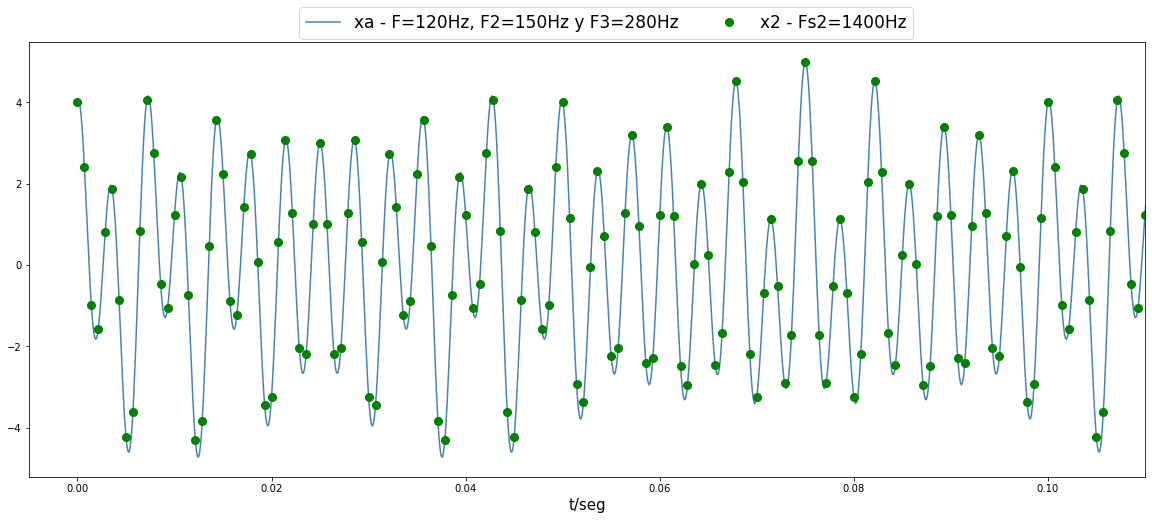

In [69]:
xlv = np.array([0,0.1])
plt.figure(figsize=(20,8))
plt.plot(t,xa,'steelblue')
plt.plot(n2/Fs2,x2,'go',ms=8)
plt.xlim(-0.005,0.11)
plt.xlabel('t/seg',fontsize=15)
plt.legend(('xa - F=120Hz, F2=150Hz y F3=280Hz','x2 - Fs2=1400Hz',),
           prop={'size':17}, ncol=3, bbox_to_anchor=(0.8,1.1))
plt.show()

### Ahora hacemos la reconstrucción

In [70]:
xrec2 = h(1000,8000,x2[0:800],1400)
t2 = np.arange(len(xrec2))/8000

<string>:9: RuntimeWarning: invalid value encountered in double_scalars


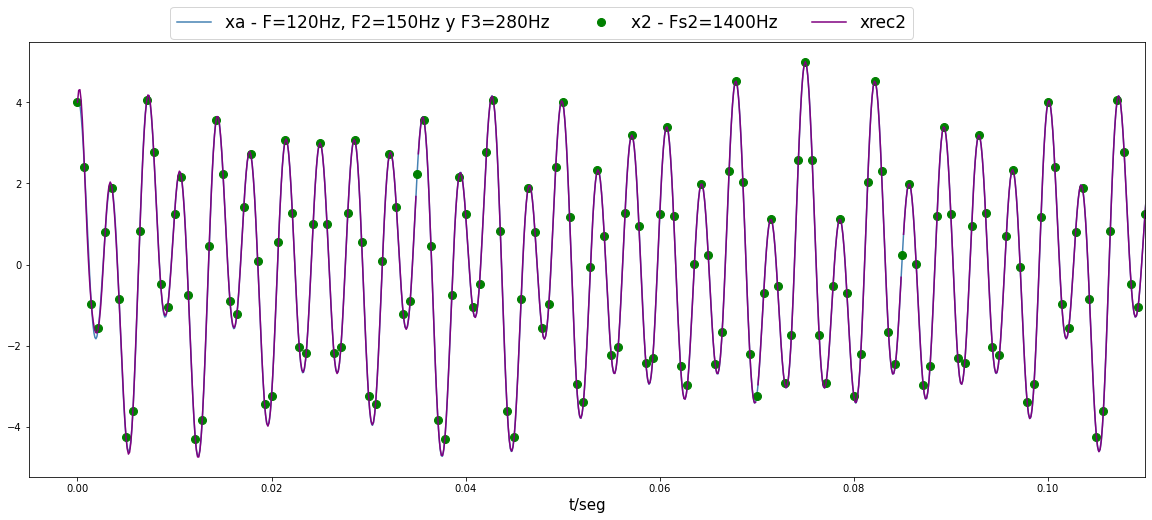

In [71]:
xlv = np.array([0,0.1])
plt.figure(figsize=(20,8))
plt.plot(t,xa,'steelblue')
plt.plot(n2/Fs2,x2,'go',ms=8)
plt.plot(t2,xrec2,'purple')
plt.xlim(-0.005,0.11)
plt.xlabel('t/seg',fontsize=15)
plt.legend(('xa - F=120Hz, F2=150Hz y F3=280Hz','x2 - Fs2=1400Hz','xrec2'),
           prop={'size':17}, ncol=3, bbox_to_anchor=(0.8,1.1))
plt.show()

### Para que valor de n en el intervalo [0,40], x2 presenta un máximo? 

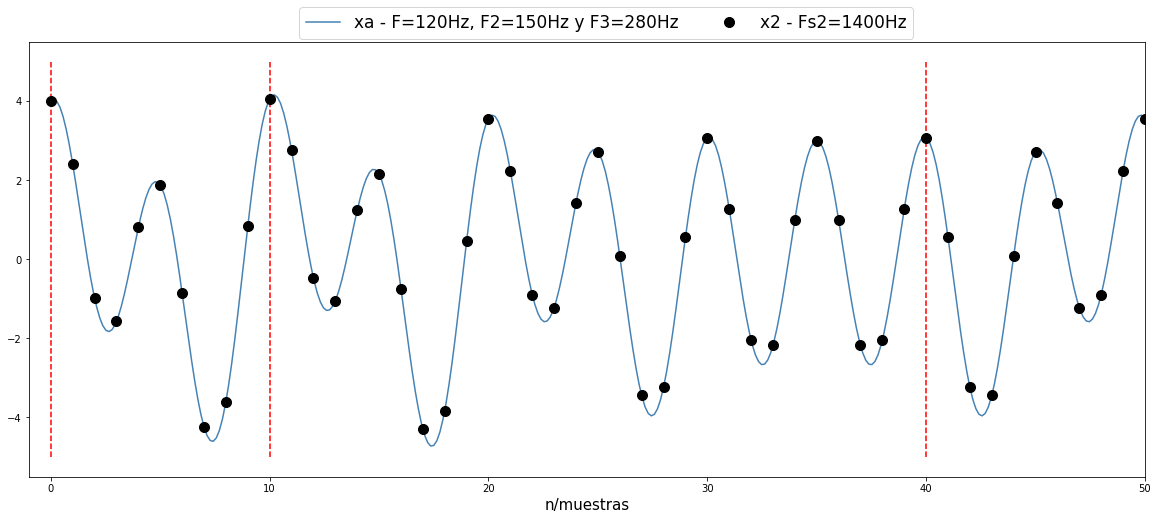

In [72]:
xlv = np.array([0,10,40])
plt.figure(figsize=(20,8))
plt.plot(t*(Fs2),xa,'steelblue')
plt.plot(n2,x2,'ko',ms=10)
plt.vlines(xlv,-5,5,linestyles='dashed',color='r')
plt.xlim(-1,50)
plt.xlabel('n/muestras',fontsize=15)
plt.legend(('xa - F=120Hz, F2=150Hz y F3=280Hz','x2 - Fs2=1400Hz'),
           prop={'size':17}, ncol=3, bbox_to_anchor=(0.8,1.1))
plt.show()

In [80]:
#Para ver dónde es el máximo, la posición de n

np.where(x2[0:40] == np.max(x2[0:40]))

(array([10]),)

In [79]:
np.max(x2[0:40]) #este es el valor máximo (la amplitud)

4.057373540976291

In [75]:
2 != 2, 2 != 5

(False, True)

### A qué tiempo corresponde?

In [76]:
10/Fs2

0.007142857142857143

- - -

### EJEMPLO TEORÍA

Sea Xa(t) = cos(40πt) + 2 sin (100πt) + 3 cos (240πt)

Xa(t) = cos(20 * 2πt) + 2 sin (50 * 2πt) + 3 cos (120 * 2πt)



In [104]:
t = np.arange(0,50,0.0001)
n = np.arange(len(t)) #definimos las muestras como un vector que tenga la misma longitud que el t
F1, F2, F3 = 20, 50, 120
Fs1 = 100
xa = np.cos(2*np.pi*F1*t) + (2*np.sin (2*np.pi*F2*t)) + (3*np.cos(2*np.pi*F3*t))
xn = np.cos(2*np.pi*(F1/Fs1)*n) + (2*np.sin (2*np.pi*(F2/Fs1)*n)) + (3*np.cos(2*np.pi*(F3/Fs1)*n))

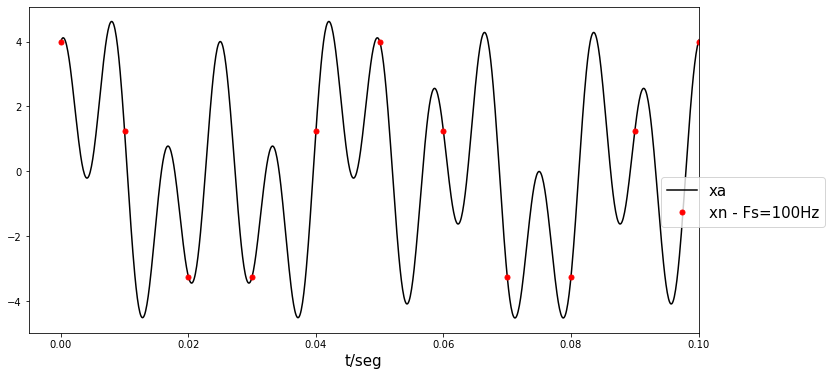

In [106]:
plt.figure(figsize=(12,6))
plt.plot(t,xa,color="black")
plt.plot(n/Fs1,xn,'ro',ms=5)
plt.xlim(-0.005,0.1)
plt.xlabel('t/seg',fontsize=15)
plt.legend(('xa', 'xn - Fs=100Hz'), prop={'size':15}, bbox_to_anchor=(1.2,0.5))
plt.show()

Xa(t) = cos(20 * 2πt) + 2 sin (50 * 2πt) + 3 cos (120 * 2πt)

Xn (t) = cos (2πn * (20/100)) + 2 sin (2πn * (50/100)) + 3 cos (2πn * (120/100))

Xn (t) =  cos (2πn * 1/5) + 2 sin (2πn * 1/2) + 3 cos (2πn * 6/5)

Xn (t) = cos (2πn * 1/5) + 2 sin (2πn * 1/2) + 3 cos[((5/5)+(1/5)) * 2πn] 

Xn (t) = cos (2πn * 1/5) + 2 sin (2πn * 1/2) + 3 cos (1/5 * 2πn)

Xn (t) = 4 cos (2πn * 1/5) + 2 sin (2πn * 1/2) 

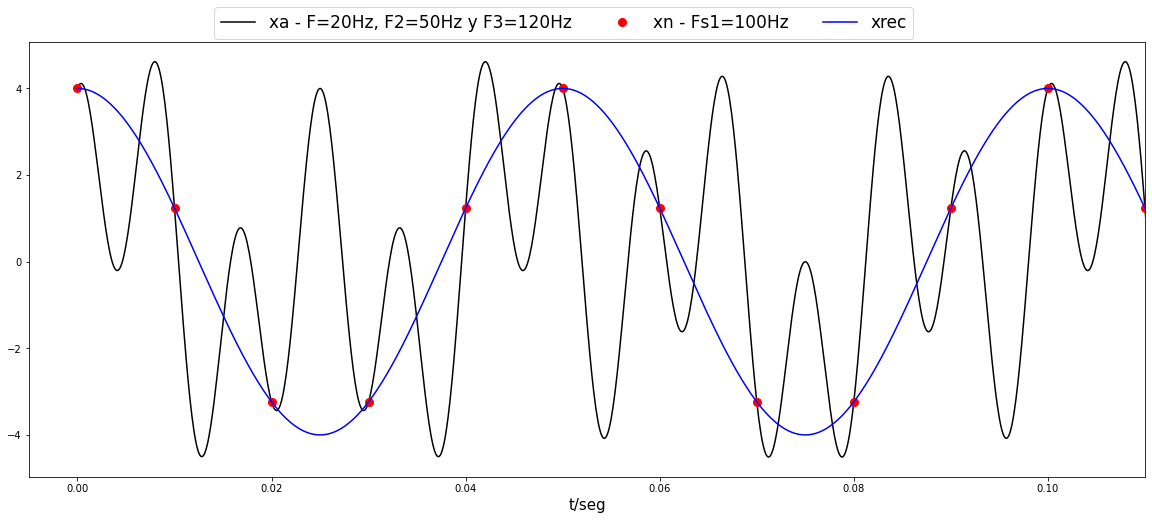

In [184]:
t = np.arange(0,50,0.0001)
n = np.arange(len(t)) #definimos las muestras como un vector que tenga la misma longitud que el t
F1, F2, F3 = 20, 50, 120
Fs1 = 100
xa = np.cos(2*np.pi*F1*t) + (2*np.sin (2*np.pi*F2*t)) + (3*np.cos(2*np.pi*F3*t))
xn = np.cos(2*np.pi*(F1/Fs1)*n) + (2*np.sin (2*np.pi*(F2/Fs1)*n)) + (3*np.cos(2*np.pi*(F3/Fs1)*n))

ya = 4*np.cos(2*np.pi*t*Fs1*(1/5)) 


plt.figure(figsize=(20,8))
plt.plot(t,xa,'black')
plt.plot(n/Fs1,xn,'ro',ms=8)
plt.plot(t,ya,color='blue')
plt.xlim(-0.005,0.11)
plt.xlabel('t/seg',fontsize=15)
plt.legend(('xa - F=20Hz, F2=50Hz y F3=120Hz','xn - Fs1=100Hz','xrec'),
           prop={'size':17}, ncol=3, bbox_to_anchor=(0.8,1.1))

In [169]:
xrec = h(1000,1000,xn[0:1000],100) # h(n, Fs1, datos, Fs) ... Fs >> Fs1
t = np.arange(len(xrec))/1000

<string>:9: RuntimeWarning: invalid value encountered in double_scalars


In [170]:
tt = np.arange(0,50,0.0001)
n = np.arange(len(tt)) #definimos las muestras como un vector que tenga la misma longitud que el t
F1, F2, F3 = 20, 50, 120
Fs1 = 100
xa = np.cos(2*np.pi*F1*tt) + (2*np.sin (2*np.pi*F2*tt)) + (3*np.cos(2*np.pi*F3*tt))
xn = np.cos(2*np.pi*(F1/Fs1)*n) + (2*np.sin (2*np.pi*(F2/Fs1)*n)) + (3*np.cos(2*np.pi*(F3/Fs1)*n))

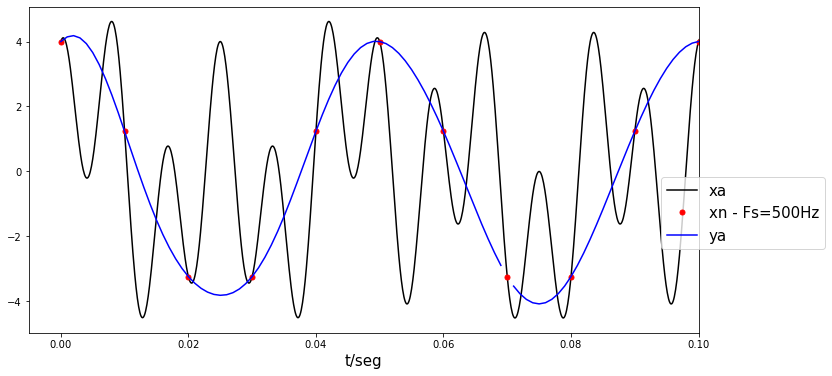

In [171]:
plt.figure(figsize=(12,6))
plt.plot(tt,xa,color="black")
plt.plot(n/Fs1,xn,'ro',ms=5)
plt.plot(t,xrec,c='blue')
plt.xlim(-0.005,0.1)
plt.xlabel('t/seg',fontsize=15)
plt.legend(('xa', 'xn - Fs=500Hz',"ya"), prop={'size':15}, bbox_to_anchor=(1.2,0.5))
plt.show()

- - -

- - -

In [143]:
t = np.arange(0,50,0.0001)
n = np.arange(len(t)) #definimos las muestras como un vector que tenga la misma longitud que el t
F1, F2, F3 = 20, 50, 120
Fs2 = 500
xa = np.cos(2*np.pi*F1*t) + (2*np.sin (2*np.pi*F2*t)) + (3*np.cos(2*np.pi*F3*t))
xn = np.cos(2*np.pi*(F1/Fs2)*n) + (2*np.sin (2*np.pi*(F2/Fs2)*n)) + (3*np.cos(2*np.pi*(F3/Fs2)*n))

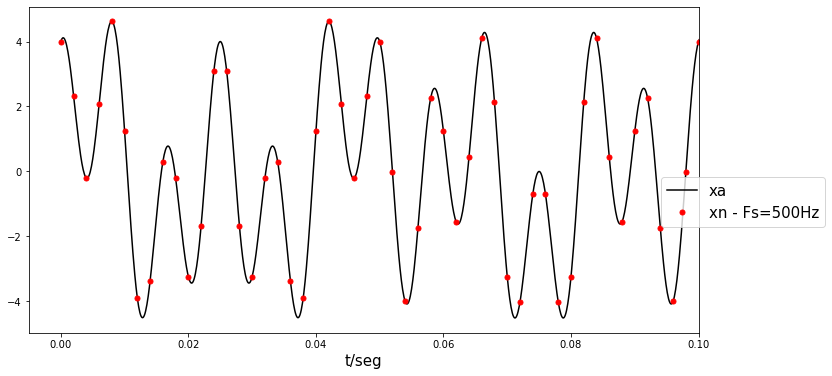

In [144]:
plt.figure(figsize=(12,6))
plt.plot(t,xa,color="black")
plt.plot(n/Fs2,xn,'ro',ms=5)
plt.xlim(-0.005,0.1)
plt.xlabel('t/seg',fontsize=15)
plt.legend(('xa', 'xn - Fs=500Hz'), prop={'size':15}, bbox_to_anchor=(1.2,0.5))
plt.show()

Xa(t) = cos(20 * 2πt) + 2 sin (50 * 2πt) + 3 cos (120 * 2πt)

Xn (t) = cos (2πt * (20/500)) + 2 sin (2πt * (50/500)) + 3 cos (2πt * (120/500))

Xn (t) =  cos (2πt * 1/25) + 2 sin (2πt * 1/10) + 3 cos (2πt * 6/25)

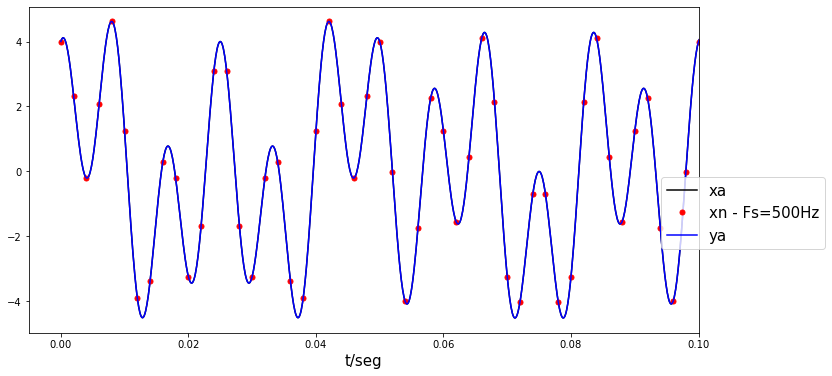

In [145]:
#ya = np.cos(2*np.pi*(F1/Fs2)*t*Fs2) + (2*np.sin (2*np.pi*(F2/Fs2)*t*Fs2)) + (3*np.cos(2*np.pi*(F3/Fs2)*t*Fs2))
ya = np.cos(2*np.pi*(1/25)*t*Fs2) + (2*np.sin (2*np.pi*(1/10)*t*Fs2)) + (3*np.cos(2*np.pi*(6/25)*t*Fs2))

plt.figure(figsize=(12,6))
plt.plot(t,xa,color="black")
plt.plot(n/Fs2,xn,'ro',ms=5)
plt.plot(t,ya,c='blue')
plt.xlim(-0.005,0.1)
plt.xlabel('t/seg',fontsize=15)
plt.legend(('xa', 'xn - Fs=500Hz',"ya"), prop={'size':15}, bbox_to_anchor=(1.2,0.5))
plt.show()

In [160]:
xrec1 = h(1000,10000,xn[0:1000],500) # h(n, Fs1, datos, Fs) ... Fs >> Fs1
t1 = np.arange(len(xrec1))/10000

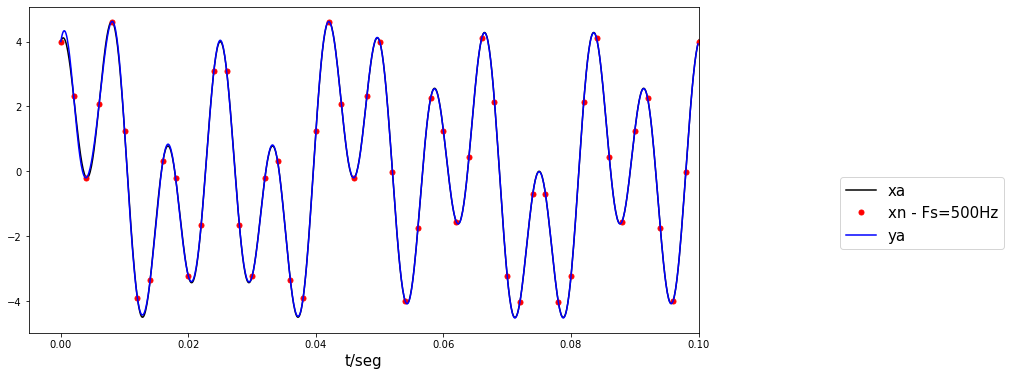

In [161]:
plt.figure(figsize=(12,6))
plt.plot(t,xa,color="black")
plt.plot(n/Fs2,xn,'ro',ms=5)
plt.plot(t1,xrec1,c='blue')
plt.xlim(-0.005,0.1)
plt.xlabel('t/seg',fontsize=15)
plt.legend(('xa', 'xn - Fs=500Hz',"ya"), prop={'size':15}, bbox_to_anchor=(1.2,0.5))
plt.show()

- - -

- - -